<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Function-definitions" data-toc-modified-id="Function-definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Function definitions</a></span></li><li><span><a href="#Setting-global-variables" data-toc-modified-id="Setting-global-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting global variables</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Finding-optimal-k-using-elbow-method" data-toc-modified-id="Finding-optimal-k-using-elbow-method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Finding optimal k using elbow method</a></span></li><li><span><a href="#Clustering-summary" data-toc-modified-id="Clustering-summary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clustering summary</a></span></li></ul></li><li><span><a href="#Plotting-clusters-(not-completed)" data-toc-modified-id="Plotting-clusters-(not-completed)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting clusters (not completed)</a></span></li></ul></div>

# Import libraries

In [1]:
import string
import collections
import nltk
import pandas as pd
import matplotlib.pyplot as plt
 
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

# Function definitions

In [72]:
def process_text(text, stem=True):

    # remove punctuation
    
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    
    # tokenize text
    
    tokens = word_tokenize(text)
    
    # remove stop words
    
    stop_words = stopwords.words('english')
    tokens = [word for word in tokens if word not in stop_words]
    
    # stem tokens

    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
 
    return tokens
 
 
def cluster_texts(texts, clusters=3):

    # Transform texts to Tf-Idf coordinates and cluster texts using K-Means 

    vectorizer = TfidfVectorizer(tokenizer=process_text,
#                                 stop_words=stopwords.words('english'),
#                                 stop_words='english',
#                                 max_df=1.0,
#                                 min_df=0.5,
                                 lowercase=True)
 
    tfidf_model = vectorizer.fit_transform(texts)#.todense()
    km_model = KMeans(n_clusters = clusters, n_jobs = 4)
    km_model.fit(tfidf_model)
 
    clustering = collections.defaultdict(list)
    #df_clusters = pd.DataFrame(columns=['No', 'Cluster']
                                
    rows_list = []
    for idx, label in enumerate(km_model.labels_):
        clustering[label].append(idx)
        rows_list.append([idx, label])
 
    df_clusters = pd.DataFrame(rows_list, columns = ['Text', 'Cluster'])  
    
    print("Top terms per cluster:")
    order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(clusters):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :5]:
            print(' %s' % terms[ind]),
        print
    
    # return clustering
    return df_clusters, tfidf_model, km_model

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kypexin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kypexin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Setting global variables

In [73]:
# articles list can be used for testing; when clustered with n_clusters = 3, 
# each 10 consequtive sentences form a cluster: cricket, AI, chemistry topics 

articles = [
    "Cricket is a bat and ball game played between two teams of eleven players each on a cricket field.", 
    'Each phase of play is called an innings during which one team bats, attempting to score as many runs as possible.', 
    'The teams have one or two innings apiece and, when the first innings ends, the teams swap roles for the next innings', 
    'Before a match begins, the two team captains meet on the pitch for the toss of a coin to determine which team will bat first.', 
    'Two batsmen and eleven fielders then enter the field and play begins when a member of the fielding team, known as the bowler, delivers the ball.', 
    'The most common dismissal in cricket match are bowled, when the bowler hits the stumps directly with the ball and dislodges the bails. Batsman gets out.', 
    'Runs are scored by two main methods: either by hitting the ball hard enough for it to cross the boundary, or by the two batsmen swapping ends.', 
    'The main objective of each team is to score more runs than their opponents.', 
    'If the team batting last is all out having scored fewer runs than their opponents, they are said to have "lost by n runs".', 
    'The role of striker batsman is to prevent the ball from hitting the stumps by using his bat and, simultaneously, to strike it well enough to score runs', 
    'Artificial intelligence is intelligence exhibited by machines, rather than humans or other animals. ', 
    'the field of AI research defines itself as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of success at some goal', 
    'The overall research goal of artificial intelligence is to create technology that allows computers and machines to function in an intelligent manner.', 
    'Natural language processing[77] gives machines the ability to read and understand human language and extract intelligence from it.', 
    'AI researchers developed sophisticated mathematical tools to solve specific subproblems. These tools are truly scientific, in the sense that their results are both measurable and verifiable.', 
    'An intelligent agent is a system that perceives its environment and takes actions which maximize its chances of success.', 
    'AI techniques have become an essential part of the technology industry, helping to solve many challenging problems in computer science.', 
    'Recent advancements in AI, and specifically in machine learning, have contributed to the growth of Autonomous Things such as drones and self-driving cars.', 
    'AI research was revived by the commercial success of expert systems,[28] a form of AI program that simulated the knowledge and analytical skills of human experts.', 
    'Advanced statistical techniques (loosely known as deep learning), access to large amounts of data and faster computers enabled advances in machine learning and perception.', 
    'A compound is a pure chemical substance composed of more than one element and the properties of a compound bear little similarity to those of its elements.', 
    'Since the properties of an element are mostly determined by its electron configuration, the properties of the elements likewise show recurring patterns or periodic behaviour.', 
    'The property of inertness of noble gases makes them very suitable in chemicals where reactions are not wanted.', 
    'The atom is also the smallest entity that can be envisaged to retain the chemical properties of the element, such as electronegativity, ionization potential and preferred oxidation state.', 
    'The nucleus is made up of positively charged protons and uncharged neutrons (together called nucleons), while the electron cloud consists of negatively charged electrons which orbit the nucleus', 
    'The atom is the basic unit of chemistry. It consists of a dense core called the atomic nucleus surrounded by a space called the electron cloud.', 
    'A chemical reaction is a transformation of some substances into one or more different substances.', 
    'Chemistry is sometimes called the central science because it bridges other natural sciences, including physics, geology and biology.', 
    'Chemistry includes topics such as the properties of individual atoms and how atoms form chemical bonds to create chemical compounds.', 
    'Chemistry is a branch of physical science that studies the composition, structure of atoms, properties and change of matter.', 
]

fname = "phrases.csv"      # file containing phrases, one per each line
lineList = []
min_sentence_length = 15    # minimum length of a sentence to be used in clustering
num_clusters = 10          # number of clusters to find
 

# Clustering

In [74]:
# populate lineList with sentences starting from minimum length; shorter sentences are omitted

with open(fname, 'r') as f:
    for line in f:
        line = line.rstrip()
        words = line.split()
        if len(words) >= min_sentence_length:
            lineList.append(line)

# running clustering algorithm            
            
df_clusters, tfidf, km = cluster_texts(lineList, num_clusters)

# for testing on on 'articles' list run:
# df_clusters, tfidf, km = cluster_texts(articles, 3)

# print(dict(clusters))

# make a data frame with sentences and corresponding cluster number for each

df_articles = pd.DataFrame({'Text':lineList})

res = df_clusters.merge(df_articles, left_on='Text', right_on=df_articles.index.values).drop(['Text', 'Text_x'], axis = 1).rename(columns={"Text_y": "Text"}).sort_values(by = 'Cluster')

pd.set_option('display.max_colwidth', -1)
res

Top terms per cluster:
Cluster 0:
 work
 site
 constructionbuild
 build
 sake
Cluster 1:
 get
 play
 like
 anoth
 dont
Cluster 2:
 thing
 languag
 understand
 abil
 speak
Cluster 3:
 god
 bodi
 come
 point
 event
Cluster 4:
 hand
 need
 troubl
 reason
 innerself
Cluster 5:
 year
 20
 thousand
 forget
 billion
Cluster 6:
 peopl
 organ
 multipl
 way
 effect
Cluster 7:
 way
 due
 grief
 give
 landscap
Cluster 8:
 mean
 realiz
 war
 cant
 friend
Cluster 9:
 mouth
 would
 mushroom
 eaten
 ryazan


,Cluster,Text
119,0,Internal work of agents led to a hack of the midterm election results and the collapse of the twin towers
115,0,"To work without a goal and salary, just for the sake of work (that's about research institutes in the USSR.)"
106,0,"Working at a construction/building site, do you build it or do you work for it?"
0,1,"Main authorities in America - law enforcement, mass media (newspapers, TV, radio, social media), government, neighborhood residents"
70,1,"When I was a boy, and Moon shined in the skies, I wanted to drink a cup of heavenly beer"
69,1,"He plays to everybody else, you play to him, and I will play to you"
68,1,"We are children of Galaxy, but the main is that we are your children, dear Earth"
67,1,This is as short as we can put asunder joint definition of of stability and stability synchronizer
66,1,"I believe that the dinosaurs exist in the fourth dimension, and we inherit spinal cords from them."
64,1,"To notice synchronicities was the first tool of human children they learnt, it was used to understand Reality"


In [66]:
tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
km.cluster_centers_
terms = tfidf.get_feature_names()
terms

AttributeError: 'matrix' object has no attribute 'get_feature_names'

In [49]:
# show single cluster contents by its number 

res_clu = res.query('Cluster == 2')
res_clu

,Cluster,Text
11,2,"Signs everywhere, traces of the so-called magic that helped to build whatever we see every day: buildings, roads, airplanes, cars, tunnels"
31,2,"A tendency to hide bad and negative shit from the eyesight, bury it, like dogs bury their waste just to look good in the eyes of their masters"
29,2,"Addiction to the reward centre in the brain: Keeping in mind not to be negligent or aspire rewards, but have right atitude towards them"
1,2,"There are different layers of existence, different things existing out there, and different methods of gaining control over material objects."
27,2,"Do you deserve free medical treatment, if you don't do the warm up and cool down exercises in the morning and don't brush your teeth?"
26,2,"Explosion with photon ray of light ceases to become a ray? Light in a vacuum is in the form of rays? In the air, it's in the form of photons?"
25,2,"Understanding of freedom comes from the ability of a fish to freely swim, as we are descendants of the fish"
24,2,"She walks in a fur coat, drives in a super automobile, and goes to see movies at the House of Cinema."
23,2,"We hope only for strength of our hands, hands of a friend and the punched in hook, and pray that security will not fail"
33,2,"What is the purpose of life?...To be the eyes and ears and conscience of the Creator of the Universe, you fool!"


## Finding optimal k using elbow method

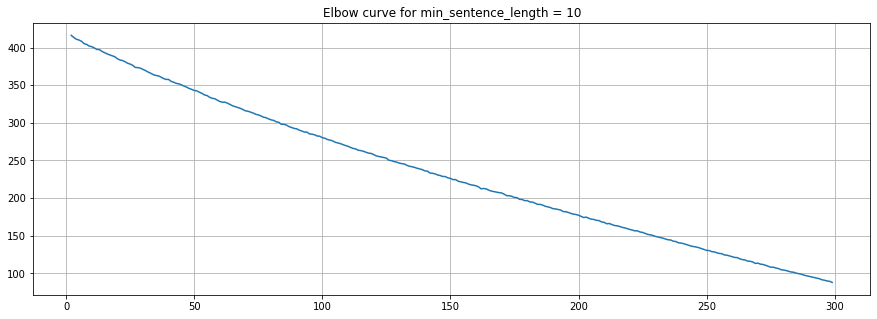

In [199]:
# elbow method allows to visually find an optimum number of clusters, 
# which is different for different minimum sentence length

X = tfidf
distorsions = []
max_clusters_elbow = 300

for k in range(2, max_clusters_elbow):
    kmeans = KMeans(n_clusters = k, n_jobs = 4)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, max_clusters_elbow), distorsions)
plt.grid(True)
plt.title('Elbow curve for min_sentence_length = ' + str(min_sentence_length))
plt.show()

## Clustering summary

In [210]:
# print number of clusters and distribution of sentences per cluster

n_clusters = res['Cluster'].nunique()
cluster_sizes = res.groupby('Cluster')['Cluster'].count()#.sort_values()

print('Total clusters: ', n_clusters)
print('\nDistribution by cluster: \n\n', cluster_sizes)

Total clusters:  50

Distribution by cluster: 

 Cluster
0     66
1     30
2     4 
3     10
4     22
5     6 
6     12
7     26
8     20
9     12
10    18
11    10
12    24
13    16
14    10
15    20
16    26
17    6 
18    28
19    14
20    16
21    12
22    8 
23    4 
24    44
25    28
26    28
27    10
28    10
29    8 
30    22
31    14
32    20
33    6 
34    14
35    18
36    26
37    8 
38    20
39    12
40    8 
41    20
42    2 
43    18
44    6 
45    10
46    28
47    10
48    14
49    20
Name: Cluster, dtype: int64


# Plotting clusters (not completed)

In [284]:
# NOT WORKING, DO NOT RUN

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(tfidf)
data2D = pca.transform(tfidf)

pca_df = pd.DataFrame(data2D, columns = ['x', 'y'])
pca_df = pca_df.drop_duplicates()

# fig, ax = plt.subplots()

plt.figure(figsize=(12, 8))

for ss in range(0, n_clusters):
    plt.scatter(pca_df['x'], pca_df['y'], color = 'lightgrey')#, s = cluster_sizes[ss])
    #plt.text(x+0.01, y+0.01, 'Cluster ' + str(txt) + ' / ' + str(cluster_sizes[i:]), fontsize='medium', fontfamily = 'sans-serif')
    #print(cluster_sizes.at[ss], '  ', ss)
    
#for i, txt in enumerate(km.labels_):
    # print(i)
#    x = data2D[:,0][i]
#    y = data2D[:,1][i]
#    plt.scatter(x + np.random.random(), y + np.random.random())
#    plt.text(x+0.01, y+0.01, 'Cluster ' + str(txt), fontsize='medium', fontfamily = 'sans-serif')

#plt.legend(x, y)    
plt.show()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.